<a href="https://colab.research.google.com/github/ViBRUS/LP3-Lab-Practicals/blob/main/LP3_ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning (ML) Practicals.
[ *BE-Final Semester* ]


By- **Vishal Sonar**

GitHub: *https://github.com/ViBRUS*



# Program 1

Assignment on Linear Regression:
The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of  developing acute backache. Find the equation of the best fit line for this data.

----

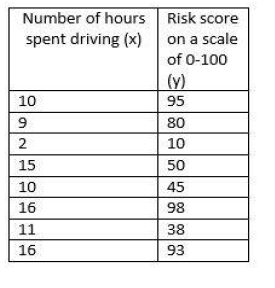

In [1]:
# Dataset
import csv
row_list = [["hours_spent", "risk_score"],
            [10,95],
            [9,80],
            [2,10],
            [15,50],
            [10,45],
            [16,98],
            [11,38],
            [16,93]
            ]
with open('hours.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)

In [2]:
#import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Read Dataset
dataset=pd.read_csv("hours.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [4]:
#Import Linear Regression and create object of it
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)
print ("Accuracy : ", regressor.score(X, y) * 100)

Accuracy :  43.709481451010035


In [5]:
#Predict value using regressor object
y_pred=regressor.predict([[8]])
print (y_pred)

[49.28781684]


In [6]:
#Take user input
hours=int(input('Enter the no of hours:'))
# 10

Enter the no of hours:10


In [7]:
#Calculate value of y
eq=regressor.coef_*hours+regressor.intercept_
print ('y = %f*%f+%f' %(regressor.coef_,hours,regressor.intercept_))
print ("Risk Score: ", eq[0])

y = 4.587899*10.000000+12.584628
Risk Score:  58.4636140637776


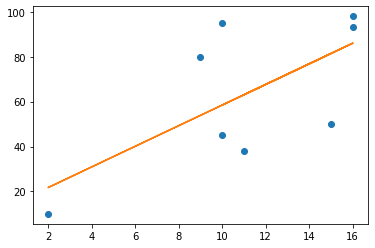

In [8]:
plt.plot(X, y, 'o')
plt.plot(X, regressor.predict(X));
plt.show()

# Program 2

> Assignment on Decision Tree Classifier:

A dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a special offer to buy a new lip-stick is shown in table below. Use this dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks in the future.
Find the root node of decision tree. According to the decision tree you have made from previous training data set, what is the decision for the test data:

**[ Age < 21, Income = Low, Gender = Female, Marital Status = Married]**?

----

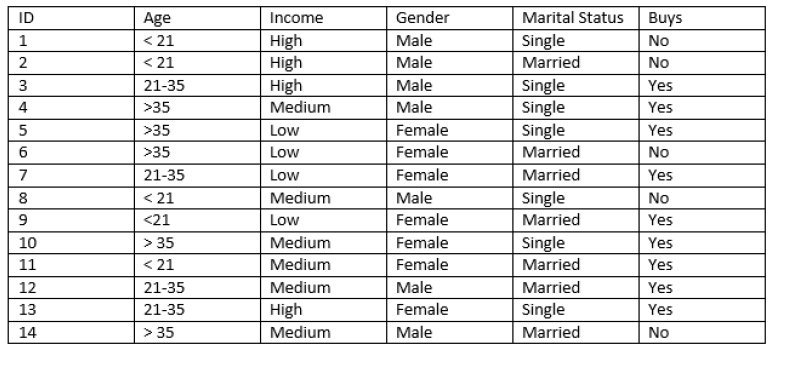

In [9]:
# Dataset
import csv
row_list = [["ID",	"AGE",	"INCOME",	"GENDER",	"MARITAL STATUS",	"BUYS"],
            [1,	'<21',	"HIGH",	"MALE",	"SINGLE",	"NO"],
            [2,	'<21',	"HIGH",	"MALE",	"MARRIED",	"NO"],
            [3,	'21-35',	"HIGH",	"MALE",	"SINGLE",	"YES"],
            [4,	'>35',	"MEDIUM",	"MALE",	"SINGLE",	"YES"],
            [5,	'>35',	"LOW",	"FEMALE",	"SINGLE",	"YES"],
            [6,	'>35',	"LOW",	"FEMALE",	"MARRIED",	"NO"],
            [7,	'21-35',	"LOW",	"FEMALE",	"MARRIED",	"YES"],
            [8,	'<21',	"MEDIUM",	"MALE",	"SINGLE",	"NO"],
            [9,	'<21',	"LOW",	"FEMALE",	"MARRIED",	"YES"],
            [10,	'>35',	"MEDIUM",	"FEMALE",	"SINGLE",	"YES"],
            [11,	'<21',	"MEDIUM",	"FEMALE",	"MARRIED",	"YES"],
            [12,	'21-35',	"MEDIUM",	"MALE",	"MARRIED",	"YES"],
            [13,	'21-35',	"HIGH",	"FEMALE",	"SINGLE",	"YES"],
            [14,	'>35',	"MEDIUM",	"MALE",	"MARRIED",	"NO"]
            ]
with open('Decisiontreedata.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)

In [10]:
#import packages 
import numpy as np 
import pandas as pd

In [11]:
#reading Dataset 
dataset=pd.read_csv("Decisiontreedata.csv") 
X=dataset.iloc[:,:-1] 
y=dataset.iloc[:,5].values 

In [12]:
#Perform Label encoding 
from sklearn.preprocessing import LabelEncoder 
labelencoder_X = LabelEncoder()

In [13]:
X = X.apply(LabelEncoder().fit_transform) 
X

,ID,AGE,INCOME,GENDER,MARITAL STATUS
0,0,1,0,1,1
1,1,1,0,1,0
2,2,0,0,1,1
3,3,2,2,1,1
4,4,2,1,0,1
5,5,2,1,0,0
6,6,0,1,0,0
7,7,1,2,1,1
8,8,1,1,0,0
9,9,2,2,0,1


In [14]:
from sklearn.tree import DecisionTreeClassifier 
regressor=DecisionTreeClassifier() 
regressor.fit(X.iloc[:,1:5],y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
#Predict value for the given expression 
X_in=np.array([1,1,0,0]) 

In [16]:
y_pred=regressor.predict([X_in]) 
print("Prediction:", y_pred)

Prediction: ['YES']


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


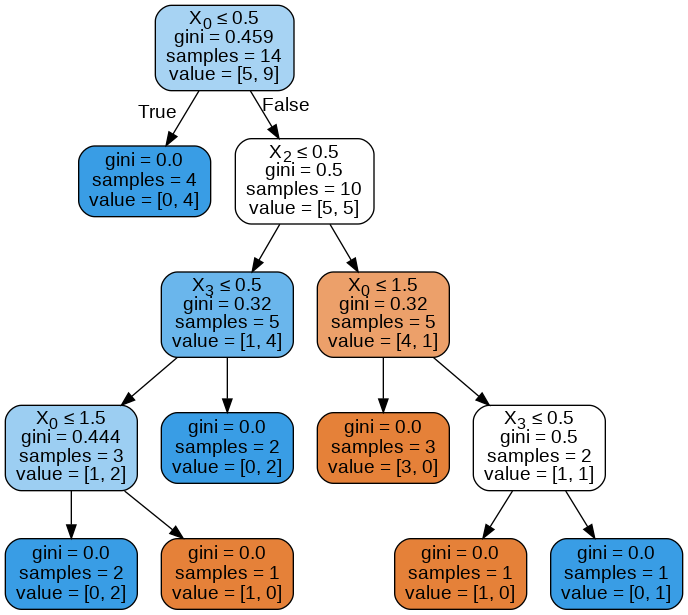

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz 
import pydotplus 
dot_data = StringIO() 
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')

Image(filename ="tree.png")

# Program 3

> Assignment on k-NN Classification:

In the following diagram let blue circles indicate positive examples and orange squares indicate negative examples. 

We want to use k-NN algorithm for classifying the points. If k=3, find the class of the point (6,6). Extend the same example for Distance-Weighted k-NN and Locally weighted Averaging

----


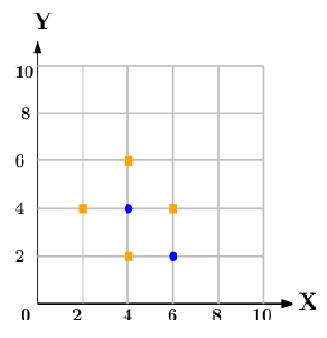

In [34]:
# Dataset
import csv
row_list = [["X",	"Y",	"class"],
            [4,	2,	"negative"],
            [6,	2,	"positive"],
            [6,	4,	"negative"],
            [4,	4,	"positive"],
            [2,	4,	"negative"],
            [4,	6,	"negative"]
            ]
with open('knndata.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)

In [35]:
#import Packages 
import numpy as np 
import pandas as pd 

In [36]:
#Read Dataset 
dataset=pd.read_csv("knndata.csv") 
X=dataset.iloc[:,:-1].values 
y=dataset.iloc[:,2].values 

In [37]:
#import KNeighborsClassifier and create object of it 
from sklearn.neighbors import KNeighborsClassifier 
classifier=KNeighborsClassifier(n_neighbors=3) 
classifier.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [38]:
#predict class for the points(6,6) 
X_test=np.array([6,6]) 
y_pred=classifier.predict([X_test]) 
print('General KNN:', y_pred)

General KNN: ['negative']


In [39]:
classifier=KNeighborsClassifier(n_neighbors=3, weights='distance') 
classifier.fit(X,y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [40]:
#predict class for the points(6,6) 
X_test=np.array([6,6]) 
y_pred=classifier.predict([X_test]) 
print('Distance Weighted KNN:', y_pred)  

Distance Weighted KNN: ['negative']


# Program 4

We have given a collection of 8 points. 
*   P1 = [0.1,0.6]
*   P2 = [0.15,0.71]
*   P3 = [0.08,0.9]
*   P4 = [0.16, 0.85]
*   P5 = [0.2,0.3]
*   P6 = [0.25,0.5]
*   P7 = [0.24,0.1]
*   P8 = [0.3,0.2]

Perform the k-mean clustering with initial centroids as 
m1=P1 = Cluster#1 = C1 and m2=P8 = cluster#2 = C2. 

Answer the following

1.   Which cluster does P6 belongs to?
2.   What is the population of cluster around m2?
3.   What is updated value of m1 and m2?
----

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

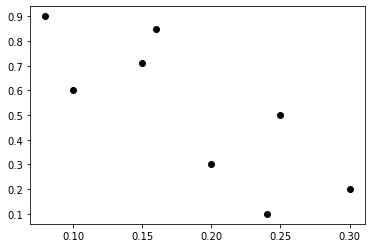

In [26]:
X = [[0.1,0.6],
    [0.15,0.71],
    [0.08,0.9],
    [0.16, 0.85],
    [0.2,0.3],
    [0.25,0.5],
    [0.24,0.1],
    [0.3,0.2]
  ]

colmap = {1: 'r', 2: 'b'}
R1 = np.array(X)[:,0]
R2 = np.array(X)[:,1]
plt.scatter(R1,R2, color='k')
plt.show()

In [27]:
centroids = np.array([[0.1,0.6],[0.3,0.2]])
print('Intial Centroids :\n',centroids)

Intial Centroids :
 [[0.1 0.6]
 [0.3 0.2]]


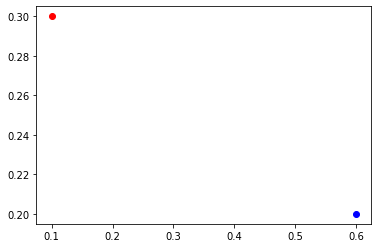

In [28]:
C_x=np.array([0.1,0.6])
C_y=np.array([0.3,0.2])
plt.scatter(C_x[0],C_y[0], color=colmap[1])
plt.scatter(C_x[1],C_y[1], color=colmap[2])
plt.show()

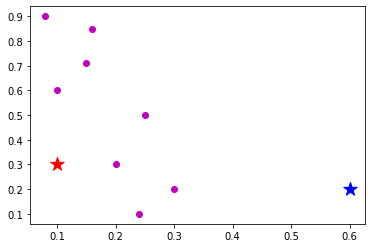

In [29]:
plt.scatter(R1,R2, c='m')
plt.scatter(C_x[0], C_y[0], marker='*', s=200, c='r')
plt.scatter(C_x[1], C_y[1], marker='*', s=200, c='b')
plt.show() 

In [30]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,init=centroids,n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True,
       init=array([[0.1, 0.6],
       [0.3, 0.2]]), max_iter=300, n_clusters=2,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [31]:
print('Labels :',model.labels_)

Labels : [0 0 0 0 1 0 1 1]


[[0.148      0.712     ]
 [0.24666667 0.2       ]]


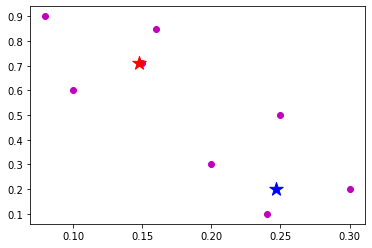

In [32]:
new_centroids = model.cluster_centers_
print(new_centroids)
plt.scatter(R1,R2, color='m')
plt.scatter(new_centroids[0][0], new_centroids[0][1], marker='*', s=200, c='r')
plt.scatter(new_centroids[1][0], new_centroids[1][1], marker='*', s=200, c='b')
plt.show()

In [33]:
print('Q.1 -> P6 belongs to cluster :',model.labels_[5])  #P6 = [0.25,0.5] 

print('Q.2 -> No. of population around cluster 2 :',np.count_nonzero(model.labels_==1))

print('Q.3 -> New Centroids:\n',model.cluster_centers_)

Q.1 -> P6 belongs to cluster : 0
Q.2 -> No. of population around cluster 2 : 3
Q.3 -> New Centroids:
 [[0.148      0.712     ]
 [0.24666667 0.2       ]]
